# Latihan Hexagonal

In [1]:
import openmc

In [3]:
UF = openmc.Material(name="Uranium Fluoride")
UF.add_nuclide("U235", 1.3784E-3)
UF.add_nuclide("U238", 9.9300E-5)
UF.add_element("H", 6.1063E-2)
UF.add_element("O", 3.3487E-2)
UF.add_element("F", 2.9554E-3)
UF.set_density("sum")
#UF.add_s_alpha_beta("c_H_in_H2O")

Al = openmc.Material(name="Aluminum")
Al.add_element("Al", 1)
Al.set_density("g/cc", 2.70)

Water = openmc.Material(name="Water")
Water.add_nuclide("H1", 2)
Water.add_nuclide("O16", 1)
Water.set_density('g/cc', 1.0)
#Water.add_s_alpha_beta("c_H_in_H2O")

materials = openmc.Materials([UF, Al, Water])
materials.export_to_xml()

material_colors = {UF : 'red', Al : 'black', Water : 'blue'}

In [4]:
tinggi_UF = 23.40
tinggi_Al = 40
inner_diameter = 15.20
tank_thickness = 0.15
jari_jari_UF = inner_diameter/2
jari_jari_Al = (inner_diameter+2*tank_thickness)/2
surface_separation = 7.60
hexa_pitch = inner_diameter+2*tank_thickness+surface_separation
tebal_Al = 1
jari_jari_silinderluar = 1.5*hexa_pitch
tinggi_silinderluar = 41

UF_silinder = openmc.ZCylinder(r=jari_jari_UF)
Al_silinder = openmc.ZCylinder(r=jari_jari_Al)
Silinderluar = openmc.ZCylinder(r=jari_jari_silinderluar, boundary_type='vacuum')
t_UF = openmc.ZPlane(z0=tinggi_UF-19)
b_UF = openmc.ZPlane(z0=-(tinggi_UF-4.4))
t_Al = openmc.ZPlane(z0=tinggi_Al/2)
b_Al = openmc.ZPlane(z0=-(tinggi_Al/2))
t_silinderluar = openmc.ZPlane(z0=tinggi_silinderluar/2, boundary_type='vacuum')
b_silinderluar = openmc.ZPlane(z0=-(tinggi_silinderluar/2), boundary_type='vacuum')

Fuel = -UF_silinder & -t_UF & +b_UF
Cladding = +UF_silinder & -Al_silinder & -t_Al & +b_Al | -Al_silinder & +b_Al & -b_UF
Void = -UF_silinder & +t_UF & -t_Al
water_out = +Al_silinder | -b_Al | +t_Al
Silinderluar_out = -Silinderluar & -t_silinderluar & +b_silinderluar

Fuel_cell = openmc.Cell(fill=UF, region=Fuel)
Cladding_cell = openmc.Cell(fill=Al, region=Cladding)
Void_cell = openmc.Cell(region=Void)
Water_cell = openmc.Cell(fill=Water, region=water_out)

pin_assembly = openmc.Universe(cells=[Fuel_cell, Cladding_cell, Void_cell, Water_cell])

hexagonal = openmc.HexLattice()
hexagonal.center = (0, 0)
hexagonal.pitch = [hexa_pitch]
hexagonal.outer = openmc.Universe(cells=[openmc.Cell(fill=Water)])
inner = [pin_assembly]
outter = [pin_assembly, pin_assembly, pin_assembly, pin_assembly, pin_assembly, pin_assembly]
hexagonal.universes = [outter, inner]

hex = openmc.Cell(fill=hexagonal, region=Silinderluar_out) 
hex_universe = openmc.Universe(cells=[hex])
geom = openmc.Geometry(hex_universe)
geom.export_to_xml()

<Axes: xlabel='y [cm]', ylabel='z [cm]'>

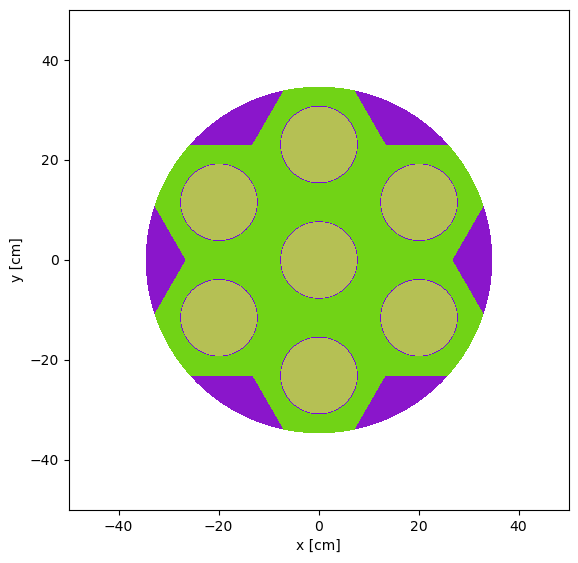

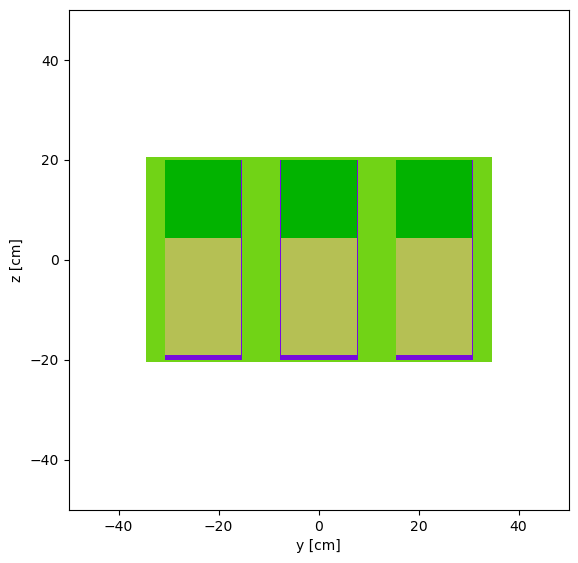

In [4]:
geom.plot(basis='xy', width=(100,100), origin=(0,0,0), pixels=(500,500), color_by='cell')
geom.plot(basis='yz', width=(100,100), origin=(0,0,0), pixels=(500,500), color_by='cell')

In [26]:
!pip install vtk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 5.1 MB/s eta 0:00:0000:0100:01


In [29]:
import vtk
# Define voxel plot
plot = openmc.Plot()
plot.type = 'voxel'
plot.width = (100.0, 100.0, 100.0)  # Dimensions in cm
plot.pixels = (200, 200, 200)       # Plot resolution
plot.color_by = 'material'          # Color by material

# Add the plot to a collection of plots
plots = openmc.Plots([plot])

# Export the plot configuration to an XML file
plots.export_to_xml()

# Generate the plot by running OpenMC in plot mode
openmc.plot_geometry()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [31]:
# Convert to vti see in paraview
openmc.voxel_to_vtk("plot_18.h5")

'plot.vti'

In [5]:
settings = openmc.Settings()
settings.particles = 100000       # Jumlah neutron per generasi
settings.inactive = 50            # Generasi yang diabaikan
settings.batches = 250            # Total generasi

koordinat = [[    0,      0,   -11.7], [ 23.1,       0,   -11.7], [-23.1,  0, -11.7],
             [    0,   20.0,  -11.7],  [    0,   -20.0,   -11.7], 
             [ 20.0,   11.55,  -11.7],  [-20.0,  -11.55,  -11.7]]
sources = {}

for i, pos in enumerate(koordinat):
    source = openmc.IndependentSource()
    source.space = openmc.stats.Point(pos)
    sources[f"source{i}"] = source
settings.source = list(sources.values())

settings.export_to_xml()

In [6]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################